# Cleaning and Analysing a Dataset of Used Cars from eBay

In this project, we'll work with a modified dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The data dictionary provided with data is as follows:
* `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
* `name` - Name of the car.
* `seller` - Whether the seller is private or a dealer.
* `offerType` - The type of listing
* `price` - The price on the ad to sell the car.
* `abtest`- Whether the listing is included in an A/B test.
* `vehicleType` - The vehicle Type.
* `yearOfRegistration` - The year in which the car was first registered.
* `gearbox` - The transmission type.
* `powerPS` - The power of the car in PS.
* `model` - The car model name.
* `odometer` - How many kilometers the car has driven.
* `monthOfRegistration` - The month in which the car was first registered.
* `fuelType` - What type of fuel the car uses.
* `brand` - The brand of the car.
* `notRepairedDamage` - If the car has a damage which is not yet repaired.
* `dateCreated` - The date on which the eBay listing was created.
* `nrOfPictures` - The number of pictures in the ad.
* `postalCode` - The postal code for the location of the vehicle.
* `lastSeenOnline` - When the crawler saw this ad last online.

Let's start by importing the libraries we need and reading the dataset into pandas.

In [1]:
import pandas as pd
import numpy as np

autos = pd.read_csv('C:\\Users\\Admin\\Desktop\\Dataset\\autos.csv')

We will now do some exploring thourgh the dataset.

In [2]:
autos.info()
autos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


**As we can see, only five columns have null data:**
* vehicleType
* gearbox
* model
* fuelType
* notRepairedDamage

**And five columns stored data as integers:**
* yearOfRegistration
* powerPS 
* monthOfRegistration
* nrOfPictures 
* postalCode 

Because the column names use [camelcase](https://en.wikipedia.org/wiki/Camel_case) instead of Python's preferred [snakecase](https://en.wikipedia.org/wiki/Snake_case), which means we can't just replace spaces with underscores.

In [3]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

 We need to change the name of the columns by using the `Dataframe.columns` attribute.

In [4]:
autos.columns = ["date_crawled", "name", "seller", "offer_type", "price", "ab_test", "vehicle_type", 
                "registration_year", "gearbox", "power_ps", "model", "odometer", "registration_month", "fuel_type", "brand",
                "unrepaired_damage", "ad_created", "num_photos", "postal_code", "last_seen"]

In [5]:
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen'],
      dtype='object')

**As you can see, the columns were renamed.**

Because this dataset is from a German website, maybe some columns will contain German words. We will explore and deal with it later.

Now let's do some basic data exploration to determine what other cleaning tasks need to be done. Initially we will look for:
* Text columns where all or almost all values are the same. These can often be dropped as they don't have useful information for analysis.
* Examples of numeric data stored as text which can be cleaned and converted.


In [6]:
autos.describe(include = 'all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


The `price` and `odometer`columns are numeric values stored as text. So, for each columns: 
* We will remove any non-numeric characters.
* Convert the columns to a numeric dtype.
* Finally, rename the `odometer` column to `odometer_km` so it is clear what the columns's values are about.

Based on the frequency of the values, we can know that the `seller`, `offer_type` and `num_photos` columns have mostly one value each. As it does not make sense to have columns like this in the dataset, we will start the cleaning process by dropping those columns.

Moving on, we can see that `price` and `odometer_km` data is stored as string because of characters such as '**,**', '**$**' and '**km**'. Follow the steps mentioned above, we will clean and convert these. 

In [7]:
autos["price"] = (autos["price"].str.replace("$", "")
                  .str.replace(",", "")
                  .astype(int))
autos["price"].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int32

In [8]:
autos["odometer"] = (autos["odometer"].str.replace("km", "")
                     .str.replace(",", "")
                     .astype(int))

autos.rename({"odometer":"odometer_km"}, axis = 1, inplace = True)
autos["odometer_km"].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int32

Now let's take a closer look in these two columns, starting with `odometer_km`.

In [9]:
# check that how many unique values
print(autos["odometer_km"].unique().shape, "\n")

# view min/max/median/mean etc
print(autos["odometer_km"].describe(), "\n")

# unique value in odometer column
uni_value_odo = autos["odometer_km"].sort_values(ascending = False).unique()
print(uni_value_odo)

(13,) 

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64 

[150000 125000 100000  90000  80000  70000  60000  50000  40000  30000
  20000  10000   5000]


It looks like the values have been rounded. The highest value is 150,000 and the lowest value is 5000. This seems plausible.

Next, let's check the `price` column.

In [10]:
# check that how many unique values
print(autos["price"].unique().shape, "\n")

# view min/max/median/mean etc
print(autos["price"].describe(), "\n")

# unique value in odometer column
uni_value_price = autos["price"].sort_values(ascending = False).unique()
print(uni_value_price)

(2357,) 

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64 

[99999999 27322222 12345678 ...        2        1        0]


The smallest value is 0 and the highest value is 99,999,999, while the second highest value is 27,322,222. The difference in value is too great, it seems that the data is not very reliable. Therefore, we need to eliminate data that is deemed unrealistic. 

We need data in a realistic range of values that can be analyzed on it. Let's dig deeper to see if we can find anything.

In [11]:
print(autos['price'].value_counts().sort_index(ascending=False).head(20), "\n")

print(autos['price'].value_counts().sort_index(ascending=True).head(20))

price
99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: count, dtype: int64 

price
0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: count, dtype: int64


We now can see the data more clearly. To make the analysis as close to reality as possible, we'll exclude rows where the `price` column is above 100 and below $1,000,000.

In [12]:
autos = autos[autos['price'].between(100, 1000000)]
autos['price'].describe()

count     48227.000000
mean       5992.208099
std       11994.952272
min         100.000000
25%        1250.000000
50%        3000.000000
75%        7499.000000
max      999999.000000
Name: price, dtype: float64

Now the data has become more realistic.

**The next thing to do is remove unnecessary columns.**

Before removing those columns, let's take a look into them.

In [13]:
print(autos["seller"].value_counts(), "\n")
print(autos["offer_type"].value_counts(), "\n")
print(autos["num_photos"].value_counts(), "\n")

seller
privat        48226
gewerblich        1
Name: count, dtype: int64 

offer_type
Angebot    48227
Name: count, dtype: int64 

num_photos
0    48227
Name: count, dtype: int64 



The `seller` and `offer_type` columns have a row with a value different from the others. 

And the `num_photos` columns only have one value.

We will now drop those columns and check if the columns were actually deleted.

In [14]:
print(autos.shape)
autos = autos.drop(["seller", "offer_type", "num_photos"], axis = 1)
print(autos.shape)

(48227, 20)
(48227, 17)


Next, we will deal with the previous problem: columns containing German words. Based on what we discorvered from the dataset, we found that `gearbox`, `fuel_type` and `unrepaired_damage` are columns cotaining German words.

In [15]:
print(autos["gearbox"].unique(), "\n")
print(autos["fuel_type"].unique(), "\n")
print(autos["unrepaired_damage"].unique(), "\n")

['manuell' 'automatik' nan] 

['lpg' 'benzin' 'diesel' nan 'cng' 'hybrid' 'elektro' 'andere'] 

['nein' nan 'ja'] 



We need to translate these words to English, and then replace it to our dataset.

We will do it in the following steps:
* We create a dictionary for each column, where German words are the keys, and English words are the values.
* After that, we'll use the `Series.map` to replace the German words for the English words in each column for the whole dataset. 

In [16]:
dict_gearbox = {'manuell' : 'manually', 'automatik' : 'automatic'}
dict_fuel_type = {'lpg' : 'lpg', 'benzin' : 'gasoline', 'diesel' : 'diesel', 'cng' : 'cng', 
                'hybrid' : 'hybrid', 'elektro' : 'elektro', 'andere' : 'other'}
dict_unrepaired_dmg = {'nein' : 'no', 'ja': 'yes'}

autos["gearbox"] = autos["gearbox"].map(dict_gearbox)
autos["fuel_type"] = autos["fuel_type"].map(dict_fuel_type)
autos["unrepaired_damage"] = autos["unrepaired_damage"].map(dict_unrepaired_dmg)

Check if the columns' data has been replaced. 

In [17]:
print(autos.loc[1:5, ["gearbox", "fuel_type", "unrepaired_damage"]])

     gearbox fuel_type unrepaired_damage
1  automatic  gasoline                no
2   manually  gasoline                no
3  automatic  gasoline                no
4   manually  gasoline                no
5  automatic    diesel               NaN


The problem has been resolved.

Let's now move on to the date columns. There are 5 columns that should represent date values: 
* `date_crawled`
* `ad_created`
* `last_seen`
* `registration_year`
* `registration_month`

The first 10 characters represent the day (e.g 2016-03-12), so to understand the date range, we can extract just the date values, using `Series.value_counts()` to generate a distribution, and then sort by the index. 

The last two are already stored as integer once they represent only years and months. The first three, however, are stored as string.

Therefore, we will use the method mentioned above to caculate the distribution of values in the `date_crwaled`, `ad_created`ad `last_seen` columns.

In [18]:
print(autos["date_crawled"].str[:10].value_counts(normalize = True, dropna = False)
                                    .sort_index())

date_crawled
2016-03-05    0.025359
2016-03-06    0.014038
2016-03-07    0.036059
2016-03-08    0.033176
2016-03-09    0.033011
2016-03-10    0.032285
2016-03-11    0.032596
2016-03-12    0.036909
2016-03-13    0.015676
2016-03-14    0.036660
2016-03-15    0.034317
2016-03-16    0.029465
2016-03-17    0.031518
2016-03-18    0.012897
2016-03-19    0.034732
2016-03-20    0.037800
2016-03-21    0.037220
2016-03-22    0.032886
2016-03-23    0.032285
2016-03-24    0.029444
2016-03-25    0.031497
2016-03-26    0.032306
2016-03-27    0.031124
2016-03-28    0.034960
2016-03-29    0.034130
2016-03-30    0.033736
2016-03-31    0.031849
2016-04-01    0.033695
2016-04-02    0.035602
2016-04-03    0.038609
2016-04-04    0.036536
2016-04-05    0.013063
2016-04-06    0.003172
2016-04-07    0.001389
Name: proportion, dtype: float64


Data was crawled almost daily between early March and early April 2016.

In [19]:
print(autos["ad_created"].str[:10].value_counts(normalize = True, dropna = False)
                         .sort_index())

ad_created
2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038858
2016-04-04    0.036888
2016-04-05    0.011798
2016-04-06    0.003255
2016-04-07    0.001244
Name: proportion, Length: 76, dtype: float64


In [20]:
print(autos["last_seen"].str[:10].value_counts(normalize = True, dropna = False)
                         .sort_index())

last_seen
2016-03-05    0.001078
2016-03-06    0.004313
2016-03-07    0.005433
2016-03-08    0.007320
2016-03-09    0.009580
2016-03-10    0.010637
2016-03-11    0.012400
2016-03-12    0.023783
2016-03-13    0.008875
2016-03-14    0.012628
2016-03-15    0.015862
2016-03-16    0.016443
2016-03-17    0.028096
2016-03-18    0.007320
2016-03-19    0.015759
2016-03-20    0.020652
2016-03-21    0.020549
2016-03-22    0.021357
2016-03-23    0.018579
2016-03-24    0.019761
2016-03-25    0.019097
2016-03-26    0.016671
2016-03-27    0.015551
2016-03-28    0.020860
2016-03-29    0.022311
2016-03-30    0.024696
2016-03-31    0.023825
2016-04-01    0.022850
2016-04-02    0.024882
2016-04-03    0.025131
2016-04-04    0.024530
2016-04-05    0.125054
2016-04-06    0.221971
2016-04-07    0.132146
Name: proportion, dtype: float64


Next, we will use `Series.describe()` to understand the distribution of `registrtion_year`. 

In [21]:
autos["registration_year"].describe()

count    48227.000000
mean      2004.730151
std         87.894768
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

The minimum value is 1000 and the maximum value is 9999. That does not make sense. We'll dig deeper into this column's data to see if we can find anything better.

In [22]:
print(autos["registration_year"].value_counts().sort_index().head(20))
print("\n")
print(autos["registration_year"].value_counts().sort_index().tail(20))

registration_year
1000    1
1001    1
1111    1
1800    2
1910    2
1927    1
1929    1
1931    1
1934    2
1937    4
1938    1
1939    1
1941    2
1943    1
1948    1
1950    1
1951    2
1952    1
1953    1
1954    2
Name: count, dtype: int64


registration_year
2010    1587
2011    1618
2012    1308
2013     801
2014     662
2015     380
2016    1202
2017    1383
2018     468
2019       2
2800       1
4100       1
4500       1
4800       1
5000       3
5911       1
6200       1
8888       1
9000       1
9999       3
Name: count, dtype: int64


Some value seems unrealistic, e.g 1000, 1001, 1111. And some value perhaps in the future. This can make analysis difficult, so we need to filter out unnecessary values and unrealistic values.

Based on the original data, we can choose an acceptable threshold from the early 1900s to 2016, because this is the year the data was crawled, so we cannot accept years greater than 2016. 

We will delete rows where the `registration_year` columns represents a year before 1900 or after 2016 using `Series.between`.

In [23]:
autos = autos[autos["registration_year"].between(1900, 2016)]
autos["registration_year"].describe()

count    46355.000000
mean      2002.939057
std          7.128186
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

The data is now clear and ready for analysis.

Next step, we will exploring `price` by `brand` to see which brand has the most expensive average price. 

In [24]:
autos.groupby("brand").price.mean().sort_values(ascending = False)

brand
porsche           46788.444444
land_rover        19108.091837
sonstige_autos    12784.556561
jaguar            11961.563380
jeep              11650.500000
mini              10639.450980
audi               9380.718548
mercedes_benz      8672.654241
bmw                8381.677306
chevrolet          6759.885932
skoda              6409.609724
kia                6018.442073
dacia              5915.528455
volkswagen         5639.900316
hyundai            5411.075431
toyota             5167.091062
volvo              4993.208038
nissan             4756.659634
seat               4433.419622
mazda              4129.774788
suzuki             4126.341818
honda              4119.109589
alfa_romeo         4100.915858
ford               4086.934219
subaru             4033.755102
citroen            3796.262673
smart              3596.402736
chrysler           3486.576687
lancia             3444.877551
mitsubishi         3439.102902
saab               3211.649351
peugeot            3113.860549
op

Based on the above analysis, we can see that Porsche is the most expensive brand, followed by Land Rover.

Let's put it on a chart and see how it shows up.

<Axes: xlabel='brand'>

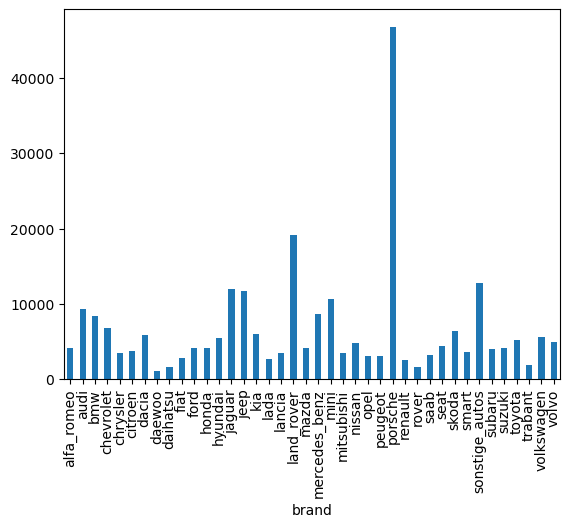

In [25]:
autos.groupby("brand").price.mean().plot.bar()

Now we can say that Porsche is the most expensive car brand you can know.

Likewise, we will continue to find out which car brands are the most popular with consumers.

In [26]:
print(autos["brand"].value_counts(normalize=True))

brand
volkswagen        0.211434
bmw               0.110172
opel              0.107238
mercedes_benz     0.096645
audi              0.086765
ford              0.069852
renault           0.047072
peugeot           0.029857
fiat              0.025607
seat              0.018250
skoda             0.016417
nissan            0.015338
mazda             0.015230
smart             0.014195
citroen           0.014044
toyota            0.012793
hyundai           0.010010
sonstige_autos    0.009535
volvo             0.009125
mini              0.008802
mitsubishi        0.008176
honda             0.007874
kia               0.007076
alfa_romeo        0.006666
porsche           0.006019
suzuki            0.005932
chevrolet         0.005674
chrysler          0.003516
dacia             0.002653
daihatsu          0.002502
jeep              0.002287
land_rover        0.002114
subaru            0.002114
saab              0.001661
jaguar            0.001532
daewoo            0.001489
trabant           0.00

Volkswagen is the most popular brand in this data set, followed by BMW. The number of Volkswagen cars is more than half that of BMW.

Another interesting thing is that 4 out of the 5 leading car manufacturers here are German, which makes perfect sense since this dataset comes from a German website.

Let's put it on the chart.

<Axes: xlabel='brand'>

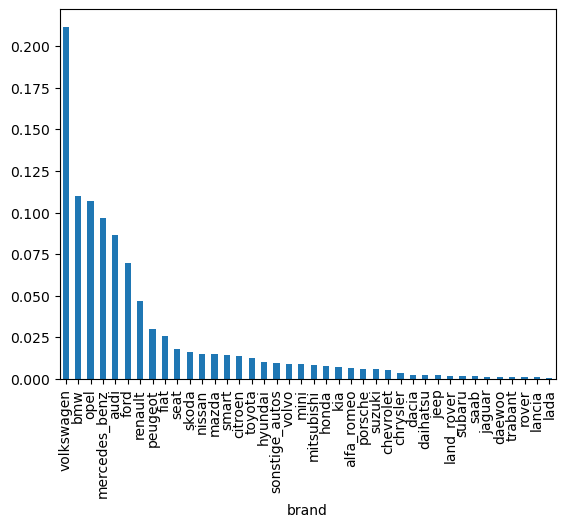

In [27]:
autos["brand"].value_counts(normalize=True).plot.bar()

There are lots of brands that don't have a significant percentage of listings, so we will limit our analysis to brands representing more than 5% of total listings.

In [28]:
brand_counts = autos["brand"].value_counts(normalize=True)
popular_brands = brand_counts[brand_counts > 0.05].index

print(popular_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object', name='brand')


Now we'll loop through the most popular brands and store the average price for each one in a dicionary. The dictionary's keys are the names of the brands and its values are the average price for that brand.

In [29]:
pop_brand_mean_prices = {}

def display_table(table):   
    table_display = []
    for key in table:
        key_tuple = (table[key], key)
        table_display.append(key_tuple)
    table_sorted = sorted(table_display, reverse=True)
    for tuple in table_sorted:
        print(tuple[1], ':', tuple[0])

for brands in popular_brands:
    brand = autos[autos['brand'] == brands]
    mean_price = brand['price'].mean()
    pop_brand_mean_prices[brands] = round(mean_price, 2)
    
display_table(pop_brand_mean_prices)

audi : 9380.72
mercedes_benz : 8672.65
bmw : 8381.68
volkswagen : 5639.9
ford : 4086.93
opel : 3005.5


The most popular brand, Audi is the most expensive one and Opel is the least expensive one.

We'll repeat the process to check on the average mileage for the most popular brands.

In [30]:
pop_brand_mean_mileage = {}

for brands in popular_brands:
    brand = autos[autos['brand'] == brands]
    mean_mileage = brand['odometer_km'].mean()
    pop_brand_mean_mileage[brands] = round(mean_mileage, 2)

display_table(pop_brand_mean_mileage)

bmw : 132695.32
mercedes_benz : 131025.67
opel : 129384.43
audi : 129245.4
volkswagen : 128804.2
ford : 124277.33


BMW has the highest mileage average while Ford has the lowest\.

Now let's aggregate these informations into a new DataFrame so it is easier to visualize and compare the brands.

In [31]:
s_price = pd.Series(pop_brand_mean_prices)
s_mileage = pd.Series(pop_brand_mean_mileage)

Finally, we convert the first serie into a DataFrame and add the second serie as a column to this new Dataframe that will then be displayed.

In [32]:
price_mileage = pd.DataFrame(s_price, columns=['mean_price'])
price_mileage['mean_mileage'] = s_mileage
price_mileage

,mean_price,mean_mileage
volkswagen,5639.90,128804.20
bmw,8381.68,132695.32
opel,3005.50,129384.43
mercedes_benz,8672.65,131025.67
audi,9380.72,129245.40
ford,4086.93,124277.33


## CONCLUSION

This project aimed to clean the dataset and then perform some analysis. Because I am a newbie, there will still be mistakes in the project. I am very happy and grateful if everyone has comments to contribute to the project. Thank you everyone for reading this far.